<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ резюме из HeadHunter

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import re

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла.

In [2]:
# Читаем данные (разделитель - точка с запятой)
df = pd.read_csv('dst-3.0_16_1_hh_database.csv', sep=';')
print(f"Размерность таблицы: {df.shape}")

Размерность таблицы: (44744, 12)


2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [3]:
df.head()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Выведите основную статистическую информацию о столбцах.

In [5]:
df.describe(include='all')

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

In [6]:
def get_education(text):
    """Извлекает уровень образования из строки"""
    text = str(text).lower()
    if text.startswith('неоконченное высшее'):
        return 'неоконченное высшее'
    elif text.startswith('высшее'):
        return 'высшее'
    elif text.startswith('среднее специальное'):
        return 'среднее специальное'
    elif text.startswith('среднее'):
        return 'среднее'
    return None

df['Образование'] = df['Образование и ВУЗ'].apply(get_education)

# Проверяем результат
print(df['Образование'].value_counts())

# Удаляем исходный столбец
df.drop(columns=['Образование и ВУЗ'], inplace=True)

Образование
высшее                 33863
среднее специальное     5765
неоконченное высшее     4557
среднее                  559
Name: count, dtype: int64


2. Теперь нас интересует столбец **"Пол, возраст"**. Создайте два новых признака **"Пол"** и **"Возраст"**.

In [7]:
# Извлекаем пол
df['Пол'] = df['Пол, возраст'].apply(
    lambda x: 'М' if x.split(' , ')[0] == 'Мужчина' else 'Ж'
)

# Извлекаем возраст
df['Возраст'] = df['Пол, возраст'].apply(
    lambda x: int(x.split(' , ')[1].split()[0])
)

# Проверяем результат
print(df['Пол'].value_counts())
print(f"\nПроцент женщин: {round((df['Пол'] == 'Ж').sum() / len(df) * 100, 2)}%")
print(f"Средний возраст: {round(df['Возраст'].mean(), 1)}")

# Удаляем исходный столбец
df.drop(columns=['Пол, возраст'], inplace=True)

Пол
М    36211
Ж     8533
Name: count, dtype: int64

Процент женщин: 19.07%
Средний возраст: 32.2


3. Следующим этапом преобразуем признак **"Опыт работы"**. Создайте признак **"Опыт работы (месяц)"** - общий опыт работы соискателя в месяцах.

In [8]:
def get_experience_months(text):
    """Извлекает опыт работы в месяцах из строки"""
    if pd.isna(text):
        return None
    if text.strip() == 'Не указано':
        return None
    
    years = 0
    months = 0
    
    # Ищем годы в начале строки
    years_match = re.search(r'^Опыт работы\s+(\d+)\s*(год|лет|года)', text)
    if years_match:
        years = int(years_match.group(1))
    
    # Ищем месяцы
    months_match = re.search(r'^Опыт работы\s+(?:\d+\s*(?:год|лет|года)\s+)?(\d+)\s*(месяц|месяцев|месяца)', text)
    if months_match:
        months = int(months_match.group(1))
    
    return years * 12 + months

df['Опыт работы (месяц)'] = df['Опыт работы'].apply(get_experience_months)

# Проверяем результат
print(df['Опыт работы (месяц)'].describe())
print(f"\nМедианный опыт работы: {df['Опыт работы (месяц)'].median()} месяцев")

# Удаляем исходный столбец
df.drop(columns=['Опыт работы'], inplace=True)

count    44574.000000
mean       114.418944
std         79.047861
min          1.000000
25%         57.000000
50%        100.000000
75%        154.000000
max       1188.000000
Name: Опыт работы (месяц), dtype: float64

Медианный опыт работы: 100.0 месяцев


4. Следующий на очереди признак **"Город, переезд, командировки"**. Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**.

In [9]:
# Список городов-миллионников
million_cities = ['Новосибирск', 'Екатеринбург', 'Нижний Новгород', 'Казань', 
                  'Челябинск', 'Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 
                  'Красноярск', 'Пермь', 'Воронеж', 'Волгоград']

def get_city(text):
    """Извлекает город и категоризирует его"""
    city = text.split(' , ')[0].strip()
    if city == 'Москва':
        return 'Москва'
    elif city == 'Санкт-Петербург':
        return 'Санкт-Петербург'
    elif city in million_cities:
        return 'город-миллионник'
    else:
        return 'другие'

def get_relocation(text):
    """Определяет готовность к переезду"""
    text_lower = text.lower()
    if 'не готов' in text_lower and 'переезд' in text_lower:
        return False
    elif 'готов к переезду' in text_lower or 'готова к переезду' in text_lower or 'хочу переехать' in text_lower:
        return True
    else:
        return False

def get_business_trip(text):
    """Определяет готовность к командировкам"""
    text_lower = text.lower()
    if 'не готов' in text_lower and 'командировк' in text_lower:
        return False
    elif 'командировк' in text_lower and ('готов к' in text_lower or 'готова к' in text_lower):
        return True
    else:
        return False

df['Город'] = df['Город, переезд, командировки'].apply(get_city)
df['Готовность к переезду'] = df['Город, переезд, командировки'].apply(get_relocation)
df['Готовность к командировкам'] = df['Город, переезд, командировки'].apply(get_business_trip)

# Проверяем результат
print(df['Город'].value_counts())
print(f"\nПроцент из СПб: {round((df['Город'] == 'Санкт-Петербург').sum() / len(df) * 100)}%")
print(f"Готовы к переезду И командировкам: {round(((df['Готовность к переезду']) & (df['Готовность к командировкам'])).sum() / len(df) * 100)}%")

# Удаляем исходный столбец
df.drop(columns=['Город, переезд, командировки'], inplace=True)

Город
Москва              16621
другие              15854
город-миллионник     7332
Санкт-Петербург      4937
Name: count, dtype: int64

Процент из СПб: 11%
Готовы к переезду И командировкам: 32%


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Выполним One Hot Encoding для этих признаков.

In [10]:
# Категории для Занятости
employment_types = ['полная занятость', 'частичная занятость', 'проектная работа', 
                   'волонтерство', 'стажировка']

# Категории для Графика
schedule_types = ['полный день', 'сменный график', 'гибкий график', 
                  'удаленная работа', 'вахтовый метод']

# One Hot Encoding для Занятости
for emp in employment_types:
    df[emp] = df['Занятость'].apply(lambda x: emp in x.lower())

# One Hot Encoding для Графика
for sched in schedule_types:
    df[sched] = df['График'].apply(lambda x: sched in x.lower())

# Проверяем результат
print(f"Проектная работа + волонтерство: {(df['проектная работа'] & df['волонтерство']).sum()}")
print(f"Вахтовый метод + гибкий график: {(df['вахтовый метод'] & df['гибкий график']).sum()}")

# Удаляем исходные столбцы
df.drop(columns=['Занятость', 'График'], inplace=True)

Проектная работа + волонтерство: 436
Вахтовый метод + гибкий график: 2311


6. (2 балла) Наконец, мы добрались до самого главного - признака заработной платы **"ЗП"**. Создадим признак **"ЗП (руб)"** - заработная плата в рублях.

In [11]:
# Загружаем таблицу с курсами валют
currencies = pd.read_csv('ExchangeRates.csv')

# Словарь соответствия валют
currency_map = {
    'руб.': 'RUB',
    'грн.': 'UAH', 
    'USD': 'USD',
    'EUR': 'EUR',
    'бел.руб.': 'BYN',
    'KGS': 'KGS',
    'сум': 'UZS',
    'AZN': 'AZN',
    'KZT': 'KZT'
}

# Извлекаем сумму и валюту из ЗП
df['ЗП_сумма'] = df['ЗП'].apply(lambda x: int(x.split()[0]))
df['Валюта'] = df['ЗП'].apply(lambda x: x.split()[1])
df['Валюта_ISO'] = df['Валюта'].map(currency_map)

# Преобразуем даты
df['Дата'] = pd.to_datetime(df['Обновление резюме'], format='%d.%m.%Y %H:%M').dt.date
currencies['Дата'] = pd.to_datetime(currencies['date'], format='%d/%m/%y').dt.date

# Объединяем таблицы (LEFT JOIN)
df = df.merge(
    currencies[['currency', 'Дата', 'close', 'proportion']],
    left_on=['Валюта_ISO', 'Дата'],
    right_on=['currency', 'Дата'],
    how='left'
)

# Для рублей заполняем курс = 1, пропорцию = 1
df.loc[df['Валюта_ISO'] == 'RUB', 'close'] = 1
df.loc[df['Валюта_ISO'] == 'RUB', 'proportion'] = 1

# Считаем ЗП в рублях
df['ЗП (руб)'] = df['ЗП_сумма'] * df['close'] / df['proportion']

# Результат
print(f"Медиана ЗП: {df['ЗП (руб)'].median():.0f} руб.")
print(f"Ответ (в тысячах): {round(df['ЗП (руб)'].median() / 1000)}")

# Удаляем временные столбцы
df.drop(columns=['ЗП', 'ЗП_сумма', 'Валюта', 'Валюта_ISO', 'Дата', 'currency', 'close', 'proportion'], inplace=True)

Медиана ЗП: 59019 руб.
Ответ (в тысячах): 59


### Проверка структуры данных после преобразований

In [12]:
print(f"Размер таблицы: {df.shape}")
df.info()

Размер таблицы: (44744, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Ищет работу на должность:        44744 non-null  object 
 1   Последнее/нынешнее место работы  44743 non-null  object 
 2   Последняя/нынешняя должность     44742 non-null  object 
 3   Обновление резюме                44744 non-null  object 
 4   Авто                             44744 non-null  object 
 5   Образование                      44744 non-null  object 
 6   Пол                              44744 non-null  object 
 7   Возраст                          44744 non-null  int64  
 8   Опыт работы (месяц)              44574 non-null  float64
 9   Город                            44744 non-null  object 
 10  Готовность к переезду            44744 non-null  bool   
 11  Готовность к командировкам       44744 non-null  boo

# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение.

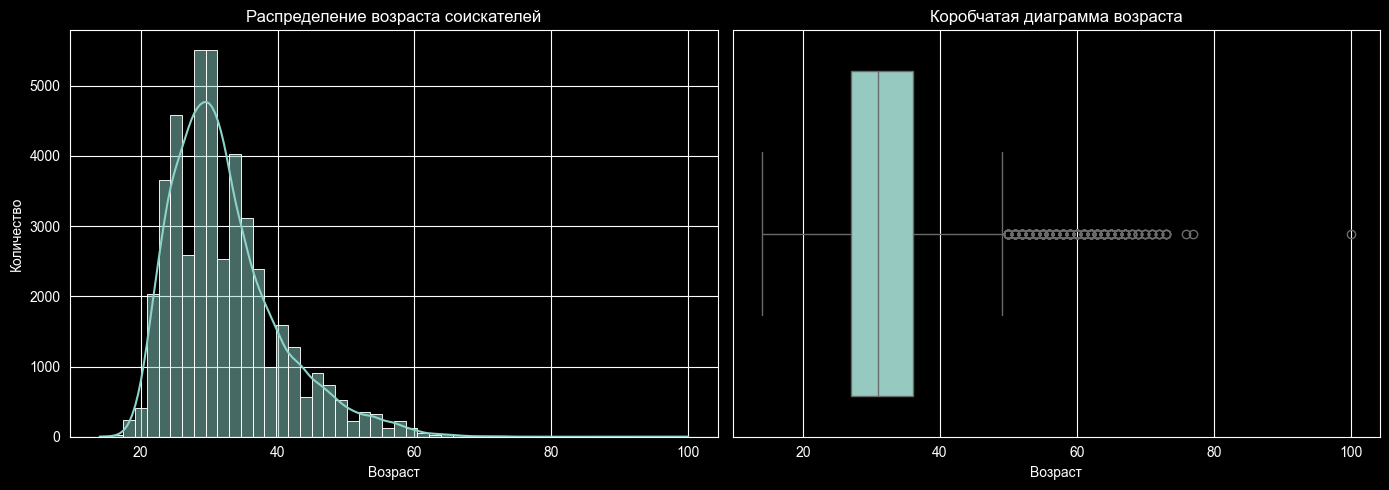

Мода: 30
Минимум: 14, Максимум: 100
Интерквартильный размах: 27 - 36


In [13]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Гистограмма
sns.histplot(df['Возраст'], bins=50, ax=axes[0], kde=True)
axes[0].set_title('Распределение возраста соискателей')
axes[0].set_xlabel('Возраст')
axes[0].set_ylabel('Количество')

# Коробчатая диаграмма
sns.boxplot(x=df['Возраст'], ax=axes[1])
axes[1].set_title('Коробчатая диаграмма возраста')
axes[1].set_xlabel('Возраст')

plt.tight_layout()
plt.show()

print(f"Мода: {df['Возраст'].mode()[0]}")
print(f"Минимум: {df['Возраст'].min()}, Максимум: {df['Возраст'].max()}")
print(f"Интерквартильный размах: {df['Возраст'].quantile(0.25):.0f} - {df['Возраст'].quantile(0.75):.0f}")

**Выводы:**
- Мода распределения возраста равна 30 годам — это самый частый возраст среди соискателей.
- Возраст варьируется от 14 до 100 лет. Большинство соискателей находятся в интервале 27-36 лет (интерквартильный размах).
- Распределение имеет правостороннюю асимметрию (скошено вправо).
- Аномалии: значения близкие к 100 годам явно являются выбросами, так как это слишком преклонный возраст для поиска работы.

2. Постройте распределение признака **"Опыт работы (месяц)"**.

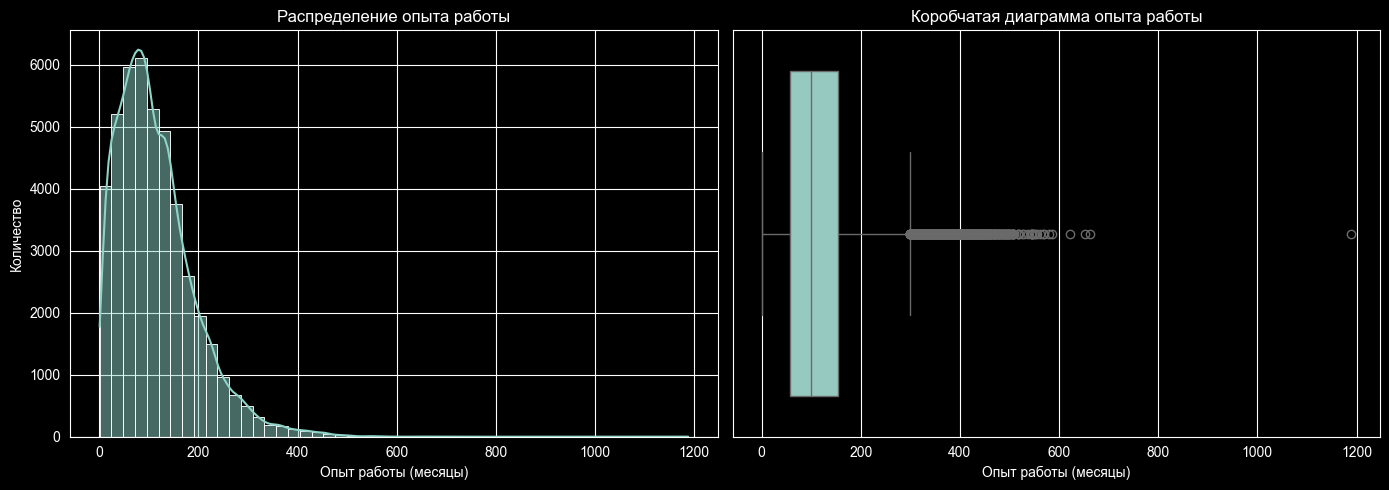

Мода: 81.0
Минимум: 1.0, Максимум: 1188.0


In [14]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Гистограмма
sns.histplot(df['Опыт работы (месяц)'].dropna(), bins=50, ax=axes[0], kde=True)
axes[0].set_title('Распределение опыта работы')
axes[0].set_xlabel('Опыт работы (месяцы)')
axes[0].set_ylabel('Количество')

# Коробчатая диаграмма
sns.boxplot(x=df['Опыт работы (месяц)'], ax=axes[1])
axes[1].set_title('Коробчатая диаграмма опыта работы')
axes[1].set_xlabel('Опыт работы (месяцы)')

plt.tight_layout()
plt.show()

print(f"Мода: {df['Опыт работы (месяц)'].mode()[0]}")
print(f"Минимум: {df['Опыт работы (месяц)'].min()}, Максимум: {df['Опыт работы (месяц)'].max()}")

**Выводы:**
- Распределение имеет правостороннюю асимметрию с модой около 81 месяца.
- Минимальный опыт — 1 месяц, максимальный — 1188 месяцев (99 лет), что является явной аномалией.
- Большинство соискателей имеют опыт работы в интервале 50-150 месяцев (4-12 лет).
- Аномалии: значения опыта свыше 400-500 месяцев требуют проверки.

3. Постройте распределение признака **"ЗП (руб)"**.

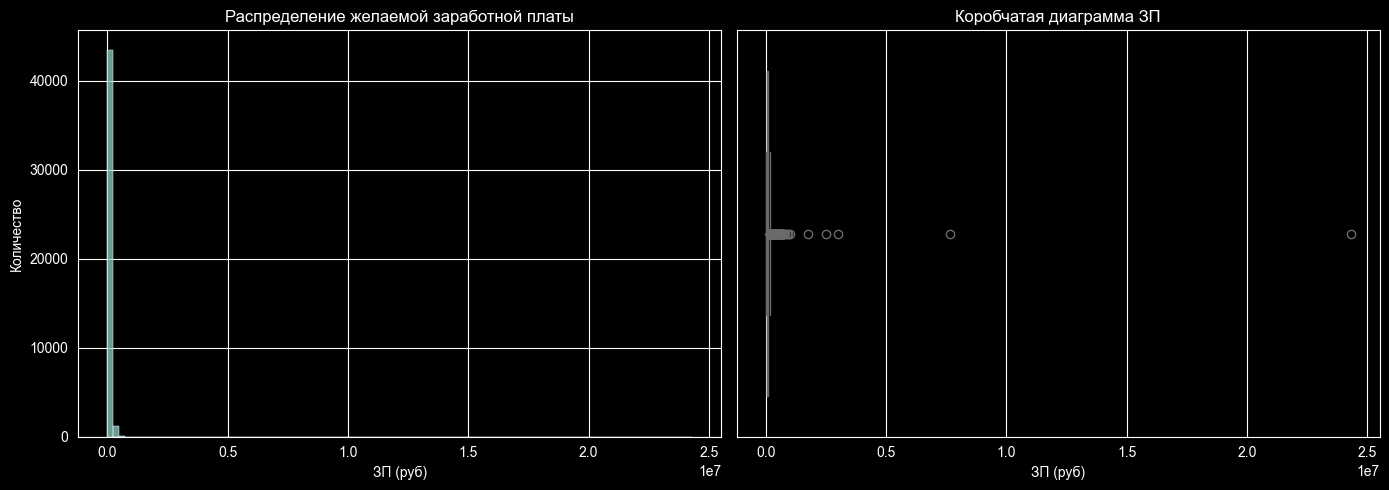

Соискателей с ЗП > 1 млн: 5
Минимум: 1, Максимум: 24304876


In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Гистограмма
sns.histplot(df['ЗП (руб)'], bins=100, ax=axes[0])
axes[0].set_title('Распределение желаемой заработной платы')
axes[0].set_xlabel('ЗП (руб)')
axes[0].set_ylabel('Количество')

# Коробчатая диаграмма
sns.boxplot(x=df['ЗП (руб)'], ax=axes[1])
axes[1].set_title('Коробчатая диаграмма ЗП')
axes[1].set_xlabel('ЗП (руб)')

plt.tight_layout()
plt.show()

print(f"Соискателей с ЗП > 1 млн: {(df['ЗП (руб)'] > 1_000_000).sum()}")
print(f"Минимум: {df['ЗП (руб)'].min():.0f}, Максимум: {df['ЗП (руб)'].max():.0f}")

**Выводы:**
- Распределение сильно скошено вправо из-за наличия экстремальных выбросов.
- Большинство соискателей указывают желаемую ЗП в диапазоне 30 000 - 100 000 рублей.
- Аномалии: 5 соискателей указали ЗП выше 1 миллиона рублей, максимальная ЗП достигает ~25 млн рублей — это явные выбросы, которые нужно удалить.

4. Постройте диаграмму зависимости медианной ЗП от уровня образования.

Образование
высшее                 60000.0
неоконченное высшее    50000.0
среднее                40000.0
среднее специальное    40000.0
Name: ЗП (руб), dtype: float64


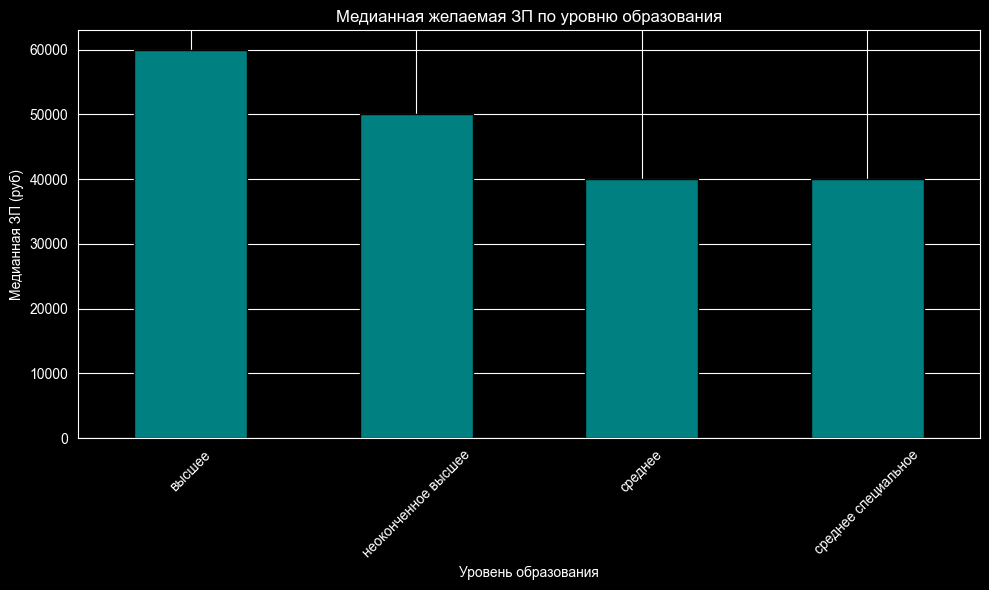

In [16]:
# Фильтруем данные с ЗП < 1 млн
df_filtered = df[df['ЗП (руб)'] < 1_000_000]

# Медианная ЗП по образованию
median_by_edu = df_filtered.groupby('Образование')['ЗП (руб)'].median().sort_values(ascending=False)
print(median_by_edu)

# График
plt.figure(figsize=(10, 6))
median_by_edu.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Медианная желаемая ЗП по уровню образования')
plt.xlabel('Уровень образования')
plt.ylabel('Медианная ЗП (руб)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Выводы:**
- Наибольшая медианная желаемая ЗП у соискателей с высшим образованием (60 000 руб).
- Наименьшая — у соискателей со средним и средним специальным образованием (40 000 руб).
- Признак уровня образования важен при прогнозировании ЗП, так как наблюдается явная зависимость: чем выше уровень образования, тем выше желаемая заработная плата.

5. Постройте диаграмму распределения ЗП в зависимости от города.

In [17]:
fig = px.box(df_filtered, x='Город', y='ЗП (руб)', 
             title='Распределение желаемой ЗП по городам')
fig.update_layout(xaxis_title='Город', yaxis_title='ЗП (руб)')
fig.show()

# Медианы по городам
print("Медианная ЗП по городам:")
print(df_filtered.groupby('Город')['ЗП (руб)'].median().sort_values(ascending=False))

Медианная ЗП по городам:
Город
Москва              85000.0
Санкт-Петербург     60000.0
город-миллионник    40000.0
другие              40000.0
Name: ЗП (руб), dtype: float64


**Выводы:**
- Москва имеет самую высокую медианную желаемую ЗП и наибольший размах значений.
- Санкт-Петербург занимает второе место по медианной ЗП.
- Города-миллионники и категория "другие" имеют схожие показатели, но ниже столичных.
- Признак города важен для прогнозирования ЗП, так как наблюдается значительная разница между регионами.

6. Постройте многоуровневую столбчатую диаграмму зависимости медианной ЗП от готовности к переезду и командировкам.

In [18]:
# Сводная таблица
pivot = df.groupby(['Готовность к переезду', 'Готовность к командировкам'])['ЗП (руб)'].median().reset_index()
print(pivot)

# График
fig = px.bar(pivot, x='Готовность к переезду', y='ЗП (руб)', 
             color='Готовность к командировкам', barmode='group',
             title='Медианная ЗП по готовности к переезду и командировкам')
fig.update_layout(xaxis_title='Готовность к переезду', yaxis_title='Медианная ЗП (руб)')
fig.show()

# Ответ
both_ready = df[(df['Готовность к переезду'] == True) & (df['Готовность к командировкам'] == True)]['ЗП (руб)'].median()
print(f"\nМедианная ЗП (готовы к переезду И командировкам): {both_ready:.0f} руб.")
print(f"В тысячах: {round(both_ready / 1000)}")

   Готовность к переезду  Готовность к командировкам   ЗП (руб)
0                  False                       False  50000.000
1                   True                       False  60000.000
2                   True                        True  65849.455



Медианная ЗП (готовы к переезду И командировкам): 65849 руб.
В тысячах: 66


**Выводы:**
- Соискатели, готовые к переезду и командировкам, запрашивают более высокую заработную плату (66 тыс. руб).
- Соискатели, не готовые ни к переезду, ни к командировкам, запрашивают наименьшую ЗП (50 тыс. руб).
- Гибкость соискателя положительно коррелирует с уровнем желаемой заработной платы.

7. Постройте тепловую карту зависимости медианной ЗП от возраста и образования.

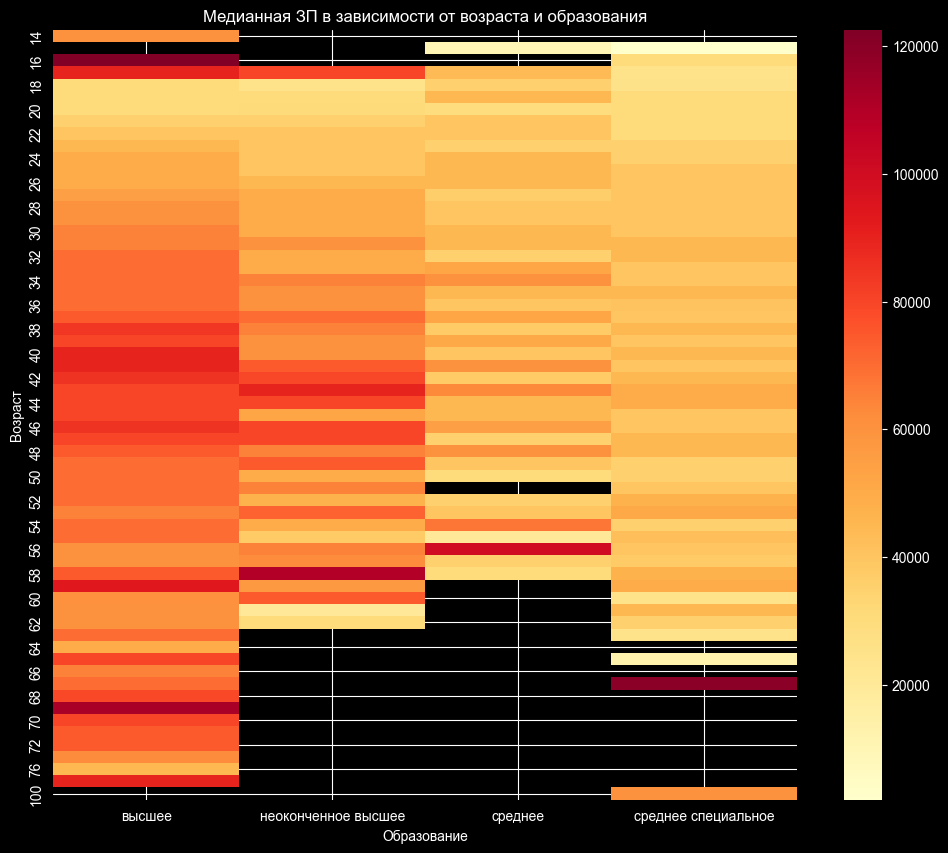

In [19]:
# Сводная таблица
pivot_table = df.pivot_table(values='ЗП (руб)', index='Возраст', columns='Образование', aggfunc='median')

# Тепловая карта
plt.figure(figsize=(12, 10))
sns.heatmap(pivot_table, cmap='YlOrRd')
plt.title('Медианная ЗП в зависимости от возраста и образования')
plt.xlabel('Образование')
plt.ylabel('Возраст')
plt.show()

**Выводы:**
- Самый быстрый карьерный рост (интенсивность роста ЗП с возрастом) наблюдается у соискателей с высшим образованием.
- Для всех категорий образования ЗП растёт с возрастом примерно до 45-50 лет, после чего рост замедляется.
- Соискатели со средним образованием имеют более равномерное распределение ЗП по возрастам.

8. Постройте диаграмму рассеяния зависимости опыта работы от возраста.

In [20]:
# Переводим опыт в годы (временная переменная, НЕ столбец)
experience_years = df['Опыт работы (месяц)'] / 12

# Диаграмма рассеяния
fig = px.scatter(x=df['Возраст'], y=experience_years, 
                 title='Зависимость опыта работы от возраста',
                 labels={'x': 'Возраст', 'y': 'Опыт работы (лет)'},
                 opacity=0.5)

# Добавляем прямую y = x
fig.add_shape(type='line', x0=0, y0=0, x1=100, y1=100,
              line=dict(color='red', width=2))
fig.show()

# Считаем аномалии
anomalies_count = (experience_years > df['Возраст']).sum()
print(f"Точек выше прямой (аномалии): {anomalies_count}")

Точек выше прямой (аномалии): 7


**Выводы:**
- 7 точек лежат строго выше красной прямой — это аномалии, где указанный опыт работы превышает возраст соискателя, что невозможно.
- Основная масса точек образует характерный треугольник: чем старше соискатель, тем больший диапазон возможного опыта работы.
- Данные аномалии необходимо удалить на этапе очистки данных.

**Дополнительные баллы**

Для получения 2 дополнительных баллов построим еще два содержательных графика.

In [21]:
# Дополнительный график 1: Распределение ЗП по полу
fig = px.box(df_filtered, x='Пол', y='ЗП (руб)', color='Пол',
             title='Распределение желаемой ЗП по полу',
             labels={'Пол': 'Пол', 'ЗП (руб)': 'Желаемая ЗП (руб)'})
fig.show()

print("Медианная ЗП по полу:")
print(df_filtered.groupby('Пол')['ЗП (руб)'].median())

Медианная ЗП по полу:
Пол
Ж    48000.0
М    60000.0
Name: ЗП (руб), dtype: float64


**Выводы по графику 1:**
- Мужчины в среднем запрашивают более высокую заработную плату, чем женщины.
- Медианная ЗП у мужчин значительно выше, что может объясняться различиями в сферах деятельности и должностях.
- Признак пола может быть важен при прогнозировании желаемой ЗП.

In [22]:
# Дополнительный график 2: Зависимость ЗП от типа занятости
employment_cols = ['полная занятость', 'частичная занятость', 'проектная работа', 'стажировка']

medians = []
for col in employment_cols:
    median_zp = df_filtered[df_filtered[col] == True]['ЗП (руб)'].median()
    medians.append({'Тип занятости': col, 'Медианная ЗП': median_zp})

emp_df = pd.DataFrame(medians)

fig = px.bar(emp_df, x='Тип занятости', y='Медианная ЗП',
             title='Медианная желаемая ЗП по типу занятости',
             color='Тип занятости')
fig.update_layout(showlegend=False)
fig.show()

print(emp_df)

         Тип занятости  Медианная ЗП
0     полная занятость       60000.0
1  частичная занятость       50000.0
2     проектная работа       60000.0
3           стажировка       40000.0


**Выводы по графику 2:**
- Соискатели, указавшие полную занятость, запрашивают наибольшую медианную ЗП.
- Стажёры ожидаемо запрашивают самую низкую заработную плату.
- Тип желаемой занятости является важным признаком для прогнозирования ЗП.

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их.

In [23]:
# Считаем дубликаты
duplicates_count = df.duplicated().sum()
print(f"Количество полных дубликатов: {duplicates_count}")

# Удаляем дубликаты
df = df.drop_duplicates()
print(f"Размер после удаления дубликатов: {df.shape}")

Количество полных дубликатов: 158
Размер после удаления дубликатов: (44586, 23)


2. Займемся пропусками. Выведите информацию о числе пропусков в столбцах.

In [24]:
print("Пропуски в столбцах:")
print(df.isnull().sum()[df.isnull().sum() > 0])

Пропуски в столбцах:
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Опыт работы (месяц)                168
dtype: int64


3. Удалите строки с пропусками в месте работы и должности. Пропуски в столбце с опытом работы заполните медианным значением.

In [25]:
# Удаляем строки с пропусками в месте работы и должности
df = df.dropna(subset=['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])
print(f"Размер после удаления пропусков: {df.shape}")

# Заполняем пропуски в опыте работы медианой
median_exp = df['Опыт работы (месяц)'].median()
df['Опыт работы (месяц)'] = df['Опыт работы (месяц)'].fillna(median_exp)

# Проверяем результат
print(f"Пропусков осталось: {df.isnull().sum().sum()}")
print(f"Среднее опыта работы: {round(df['Опыт работы (месяц)'].mean())}")

Размер после удаления пропусков: (44584, 23)
Пропусков осталось: 0
Среднее опыта работы: 114


4. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [26]:
# Считаем выбросы
outliers_zp = df[(df['ЗП (руб)'] > 1_000_000) | (df['ЗП (руб)'] < 1000)]
print(f"Выбросов по ЗП: {len(outliers_zp)}")

# Удаляем выбросы
df = df[(df['ЗП (руб)'] >= 1000) & (df['ЗП (руб)'] <= 1_000_000)]
print(f"Размер после удаления: {df.shape}")

Выбросов по ЗП: 89
Размер после удаления: (44495, 23)


5. Найдите и удалите резюме, в которых опыт работы в годах превышал возраст соискателя.

In [27]:
# Считаем выбросы
outliers_exp = df[df['Опыт работы (месяц)'] / 12 > df['Возраст']]
print(f"Выбросов (опыт > возраст): {len(outliers_exp)}")

# Удаляем выбросы
df = df[df['Опыт работы (месяц)'] / 12 <= df['Возраст']]
print(f"Размер после удаления: {df.shape}")

Выбросов (опыт > возраст): 7
Размер после удаления: (44488, 23)


6. Найдите выбросы по возрасту с помощью метода z-отклонения в логарифмическом масштабе.

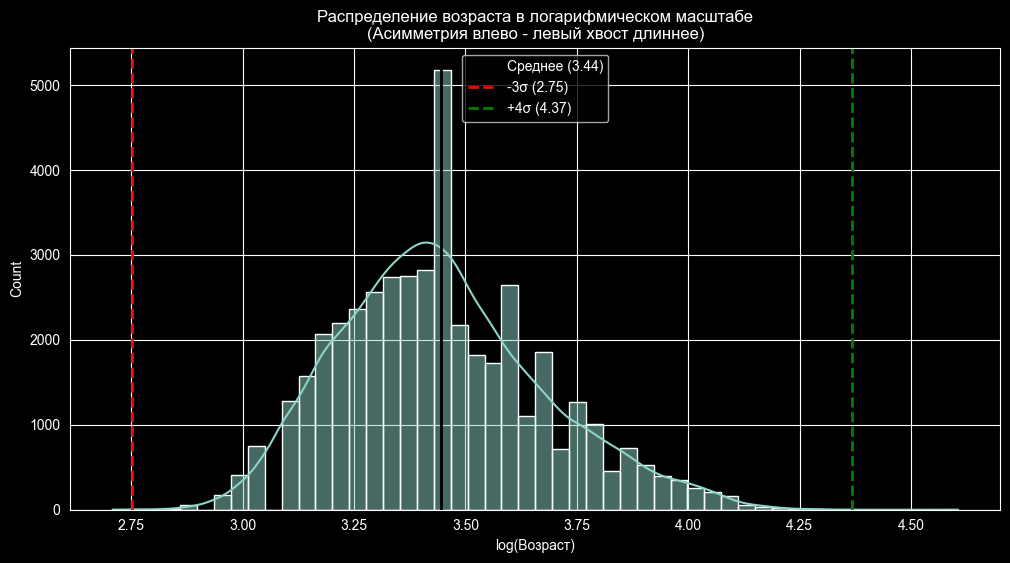

Нижняя граница (возраст): 15.7
Верхняя граница (возраст): 78.9

Выбросов по возрасту: 3

Таблица выбросов:
       Возраст  Опыт работы (месяц)  ЗП (руб)
31137       15                  2.0   10000.0
32950       15                  3.0    2000.0
33654      100                 30.0   60000.0

Итоговый размер данных: (44485, 23)


In [28]:
# Логарифм возраста
log_age = np.log(df['Возраст'])

# График
plt.figure(figsize=(12, 6))
histplot = sns.histplot(log_age, bins=50, kde=True)

# Линии среднего и границ
mean = log_age.mean()
std = log_age.std()

histplot.axvline(mean, color='k', lw=2, label=f'Среднее ({mean:.2f})')
histplot.axvline(mean - 3 * std, color='r', lw=2, linestyle='--', label=f'-3σ ({mean - 3*std:.2f})')
histplot.axvline(mean + 4 * std, color='g', lw=2, linestyle='--', label=f'+4σ ({mean + 4*std:.2f})')

plt.title('Распределение возраста в логарифмическом масштабе\n(Асимметрия влево - левый хвост длиннее)')
plt.xlabel('log(Возраст)')
plt.legend()
plt.show()

# Границы
lower_bound = mean - 3 * std
upper_bound = mean + 4 * std

print(f"Нижняя граница (возраст): {np.exp(lower_bound):.1f}")
print(f"Верхняя граница (возраст): {np.exp(upper_bound):.1f}")

# Находим выбросы
outliers_age = df[(log_age < lower_bound) | (log_age > upper_bound)]
print(f"\nВыбросов по возрасту: {len(outliers_age)}")
print(f"\nТаблица выбросов:")
print(outliers_age[['Возраст', 'Опыт работы (месяц)', 'ЗП (руб)']].sort_values('Возраст'))

# Удаляем выбросы
df = df[(log_age >= lower_bound) & (log_age <= upper_bound)]
print(f"\nИтоговый размер данных: {df.shape}")

**Комментарий:**

Логарифмическое распределение возраста асимметрично **влево** — левый хвост длиннее правого.

С помощью метода z-отклонения (3σ влево, 4σ вправо с послаблением) обнаружено 3 выброса:
- 2 соискателя возраста 15 лет (ниже нижней границы ~15.7 лет)
- 1 соискатель возраста 100 лет (выше верхней границы ~79 лет)

Эти значения являются аномальными для рынка труда и были удалены из данных.